# IE406 Machine Learning [LAB-5]

---

### Devdeep Shetrajiwala : 202001150

### Divya Patel : 202001420


In [126]:
!pip install cvxpy

C:\Users\Devdeep\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

#Change dpi of plots
plt.rcParams['figure.dpi'] = 100
import seaborn as sns 
sns.set_style("whitegrid")

## Problem 1: Support Vector Machine (SVM) on Iris Dataset

Perform SVM on the Iris dataset using the following steps:

#### A - Use the `sklearn` SVM classifier and perform classification on the dataset.


In [128]:
def plotConfusionMatrix(yTest, yPred, kernelName):
    confusionMatrix = confusion_matrix(yTest, yPred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusionMatrix, annot=True, fmt='.4g')
    plt.title('Confusion Matrix for Kernel: {}'.format(
        kernelName), fontsize=15)
    plt.ylabel('True', fontsize=15)
    plt.xlabel('Predicted', fontsize=15)
    plt.show()
    print(classification_report(yTest, yPred))
    print("==================================================================")
    print("==================================================================")


def svmFunc(xTrain, xTest, yTrain, yTest, kernelName):
    clf = svm.SVC(kernel=kernelName)
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    plotConfusionMatrix(yTest, yPred, kernelName)

In [129]:
# Load the iris dataset as pandas DataFrame
from pandas import read_csv
data = read_csv('iris.csv')

x = data.drop(['Species', 'Id'], axis=1)
y = data['Species']


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0)

# Convert pandas DataFrame to numpy array for compatibility with sklearn ---> x_train, x_test, y_train, y_test
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

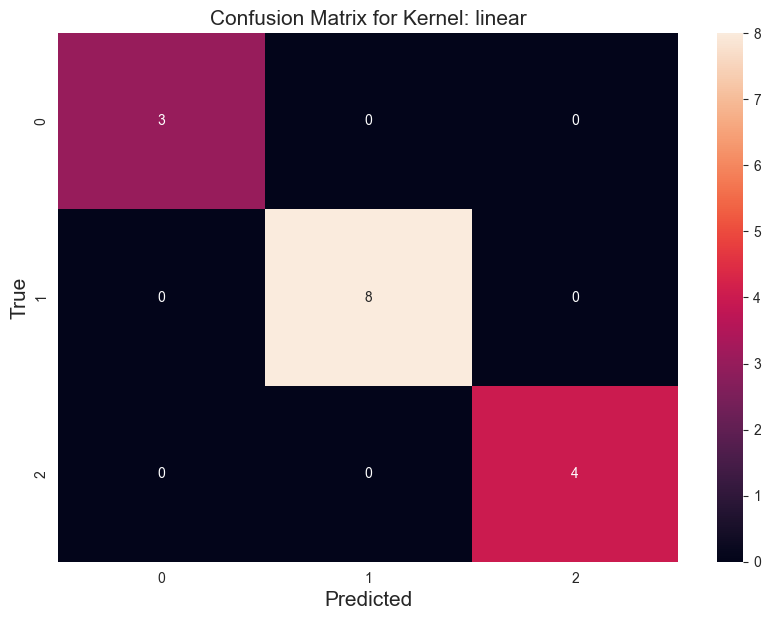

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [130]:
svmFunc(x_train, x_test, y_train, y_test, "linear")

#### B - Normalize the data and then perform the same experiment on the normalized data.


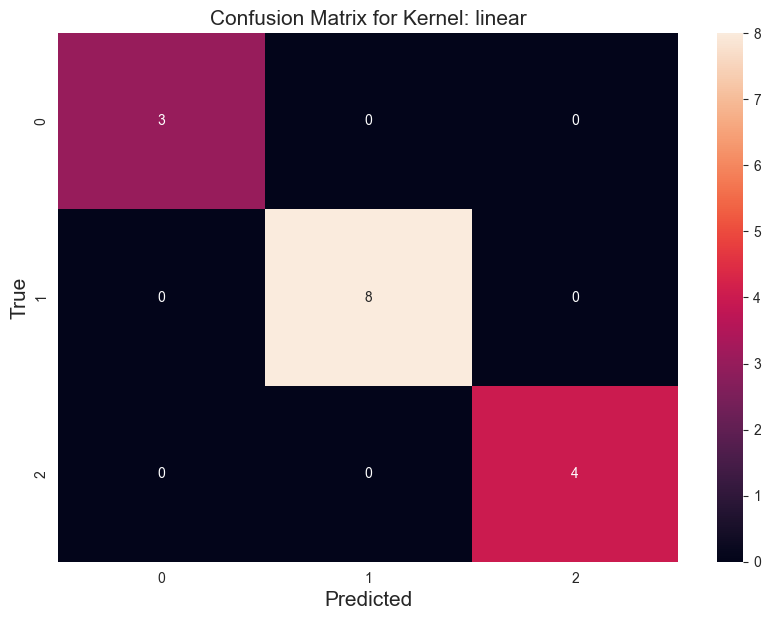

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [131]:
# Normalize the data
sc = MinMaxScaler()
x_norm_train = sc.fit_transform(x_train)
x_norm_test = sc.transform(x_test)

svmFunc(x_train, x_test, y_train, y_test, "linear")

#### C - Use the given SVM kernels and perform SVM classification:

1. Linear
2. Poly
3. RBF
4. Sigmoid
5. Precomputed


Kernel:  linear


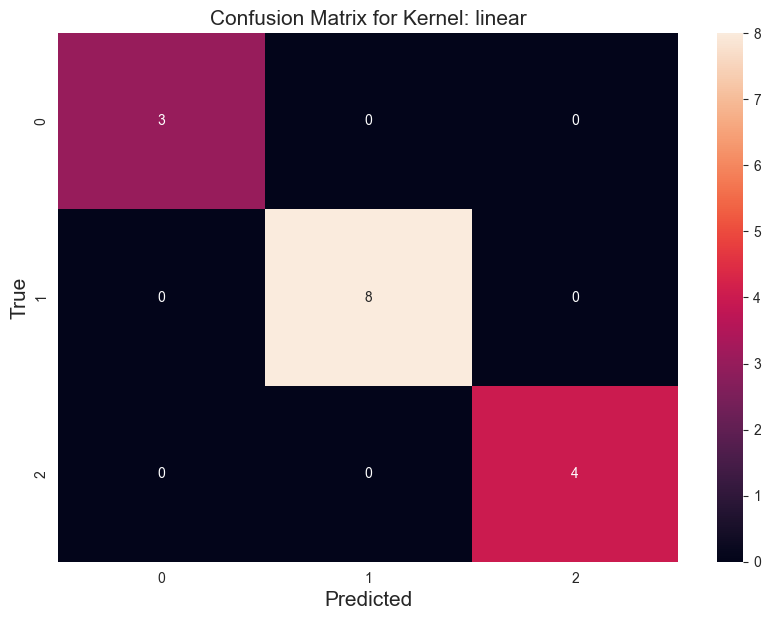

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Kernel:  poly


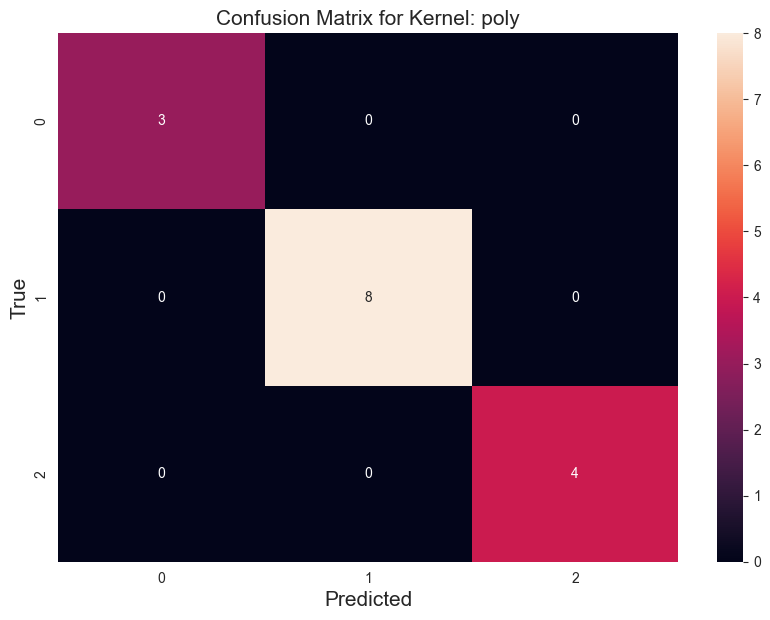

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Kernel:  rbf


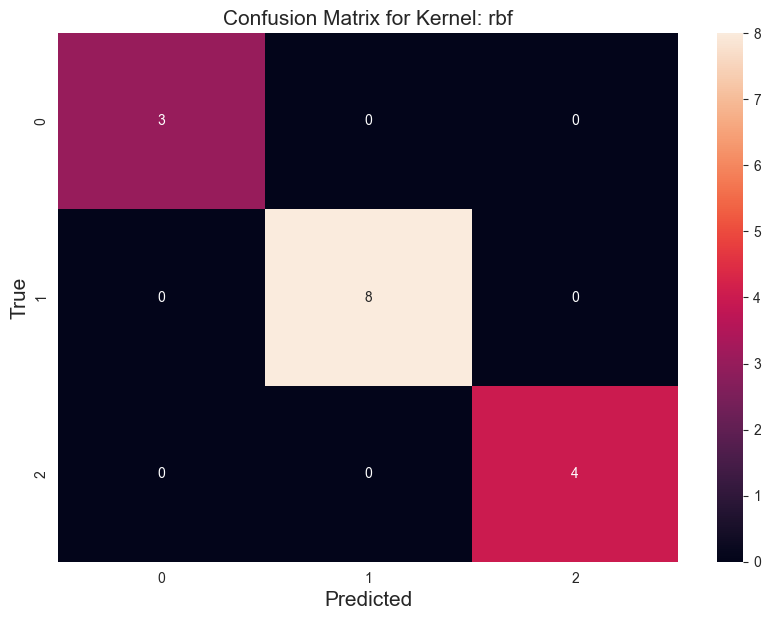

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Kernel:  sigmoid


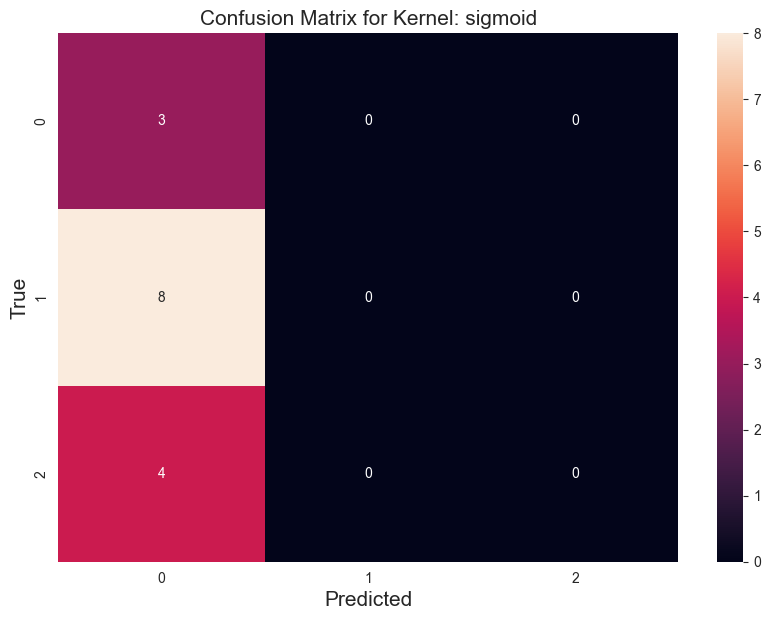

                 precision    recall  f1-score   support

    Iris-setosa       0.20      1.00      0.33         3
Iris-versicolor       0.00      0.00      0.00         8
 Iris-virginica       0.00      0.00      0.00         4

       accuracy                           0.20        15
      macro avg       0.07      0.33      0.11        15
   weighted avg       0.04      0.20      0.07        15

Kernel: precomputed


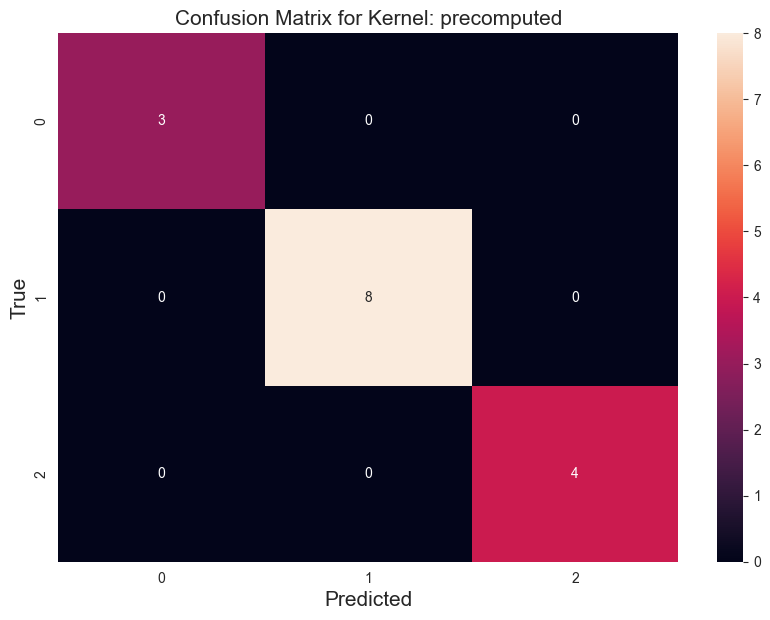

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Kernel:  linear


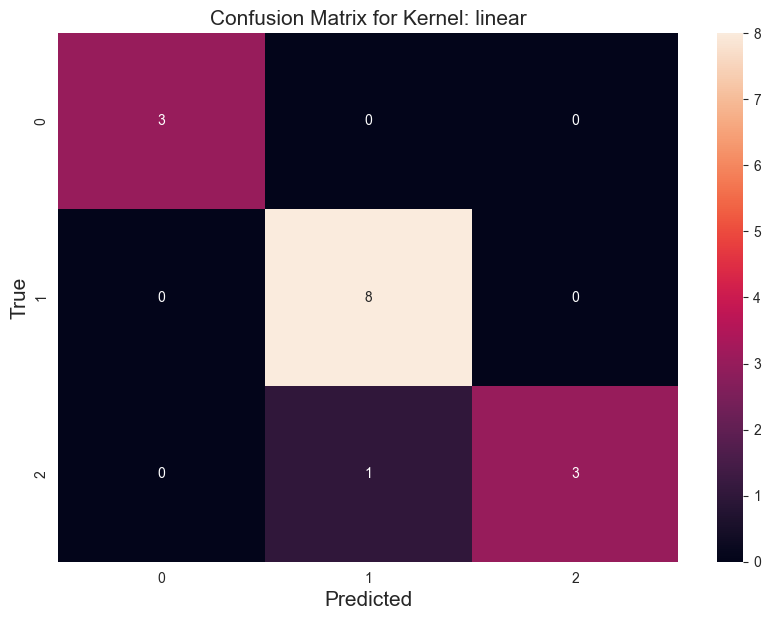

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.75      0.86         4

       accuracy                           0.93        15
      macro avg       0.96      0.92      0.93        15
   weighted avg       0.94      0.93      0.93        15

Kernel:  poly


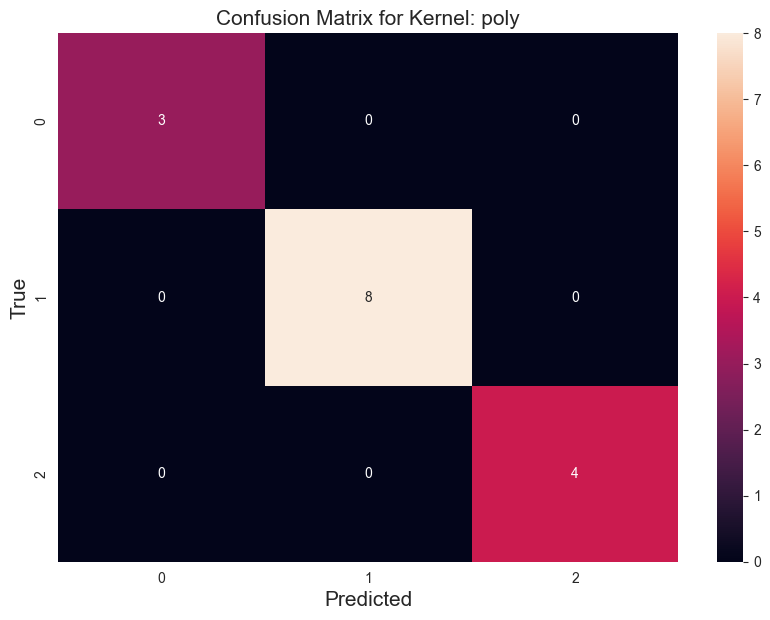

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Kernel:  rbf


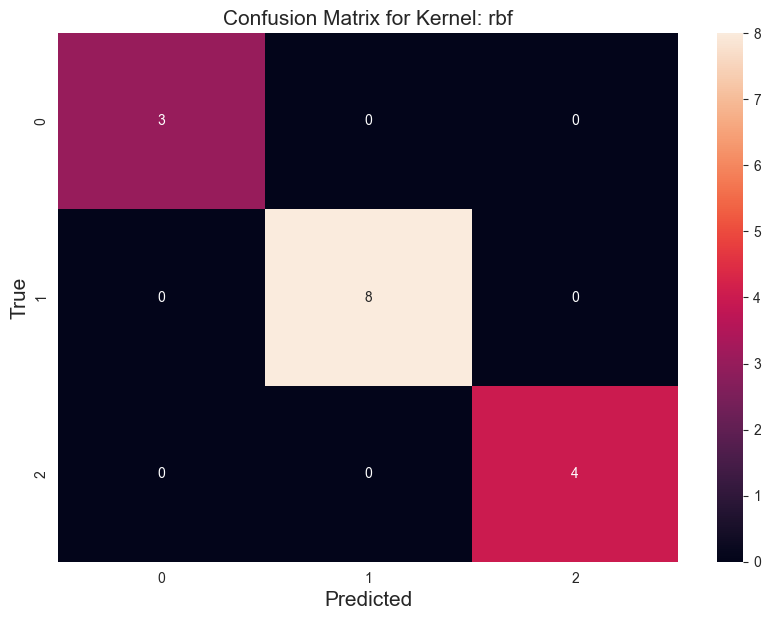

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

Kernel:  sigmoid


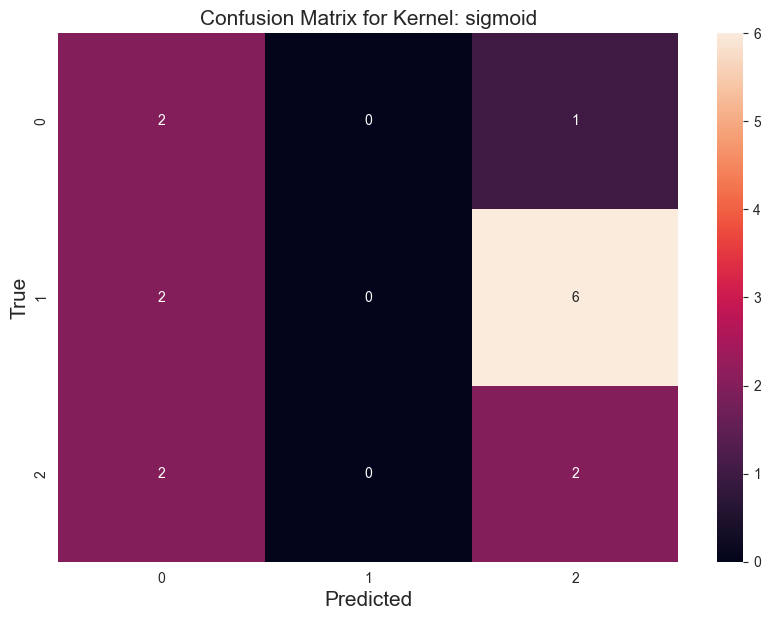

                 precision    recall  f1-score   support

    Iris-setosa       0.33      0.67      0.44         3
Iris-versicolor       0.00      0.00      0.00         8
 Iris-virginica       0.22      0.50      0.31         4

       accuracy                           0.27        15
      macro avg       0.19      0.39      0.25        15
   weighted avg       0.13      0.27      0.17        15

Kernel: precomputed


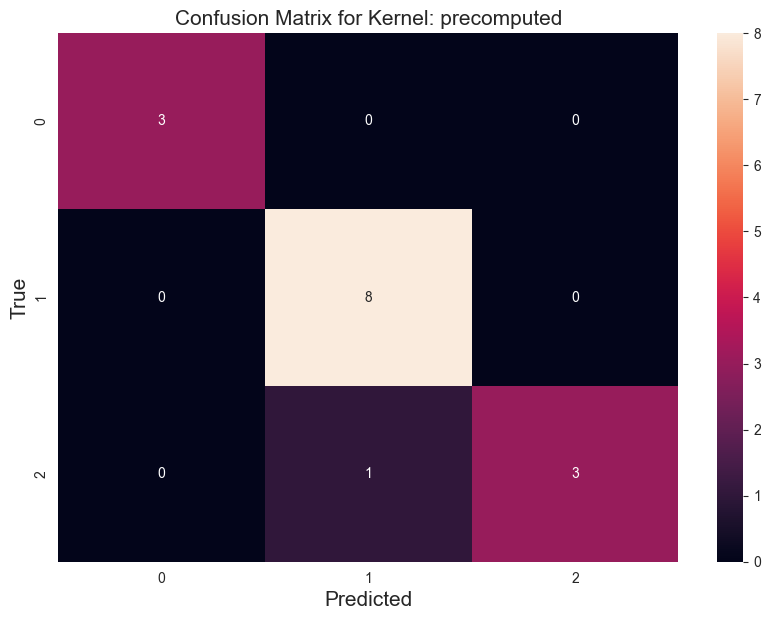

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.75      0.86         4

       accuracy                           0.93        15
      macro avg       0.96      0.92      0.93        15
   weighted avg       0.94      0.93      0.93        15



In [132]:
def svmFunc_precomputed(x_train, x_test, y_train, y_test):
    gram_train = np.dot(x_train, x_train.T)
    gram_test = np.dot(x_test, x_train.T)
    clf = svm.SVC(kernel='precomputed')
    clf.fit(gram_train, y_train)
    y_pred = clf.predict(gram_test)
    plot_confusion_matrix(y_test, y_pred, 'precomputed')
    print("==================================================================")
    print("==================================================================")


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print('Kernel: ', kernel)
    svmFunc(x_train, x_test, y_train, y_test, kernel)

print('Kernel: precomputed')
svmFunc_precomputed(x_train, x_test, y_train, y_test)


### Again with normalized data ###

sc = MinMaxScaler()
x_norm_train = sc.fit_transform(x_train)
x_norm_test = sc.transform(x_test)

for kernel in kernels:
    print('Kernel: ', kernel)
    svmFunc(x_norm_train, x_norm_test, y_train, y_test, kernel)

print('Kernel: precomputed')
svmFunc_precomputed(x_norm_train, x_norm_test, y_train, y_test)

### Problem 2 - Perform SVM on this dataset.

#### A) - Use the `sklearn` SVM classifier and perform classification on the dataset.


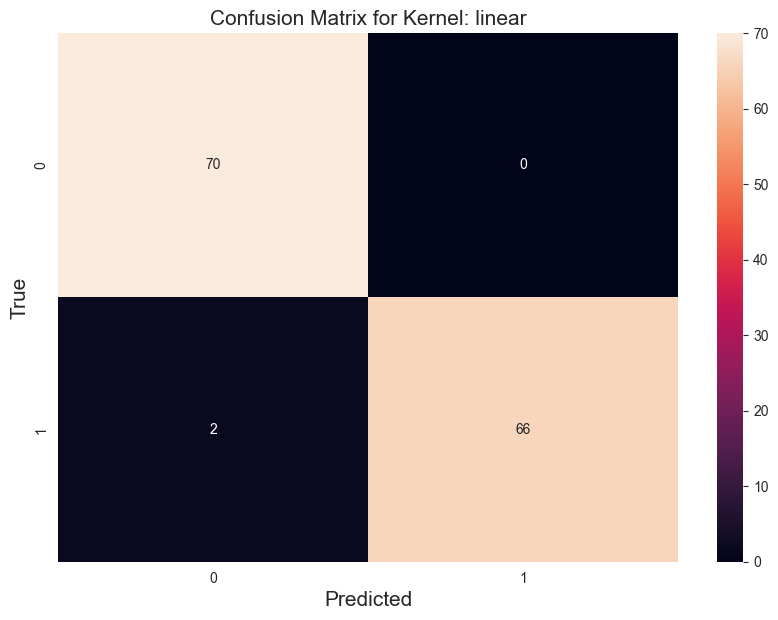

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.97      0.99        68

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [133]:
data = pd.read_csv("bill_authentication.csv")

x = data.drop('Class', axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

svmFunc(x_train, x_test, y_train, y_test, "linear")

#### B) - Normalize the data and then perform the same experiment on the normalized data.


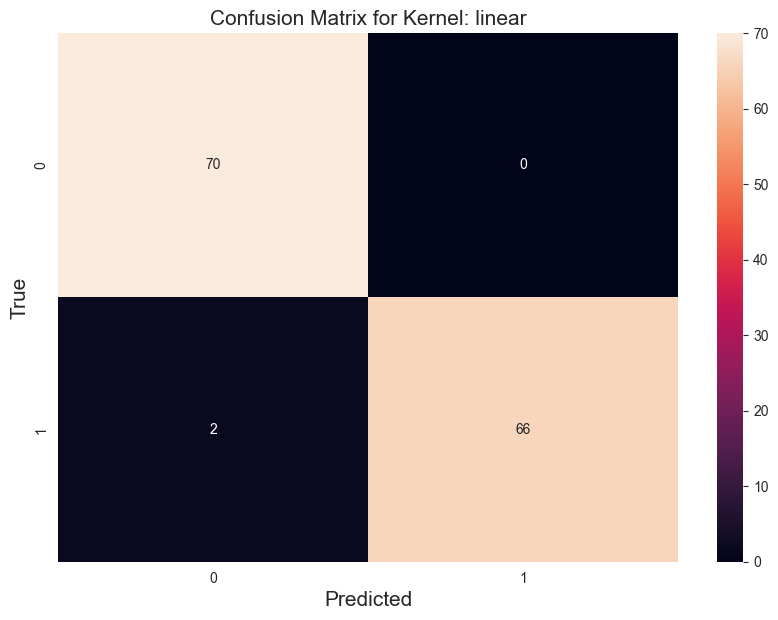

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.97      0.99        68

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [134]:
# Normalize the data
sc = MinMaxScaler()
x_norm_train = sc.fit_transform(x_train)
x_norm_test = sc.transform(x_test)

svmFunc(x_train, x_test, y_train, y_test, "linear")

#### C) - Use the given SVM kernels and perform SVM classification:

1. Linear
2. Poly
3. RBF
4. Sigmoid
5. Precomputed


Kernel:  linear


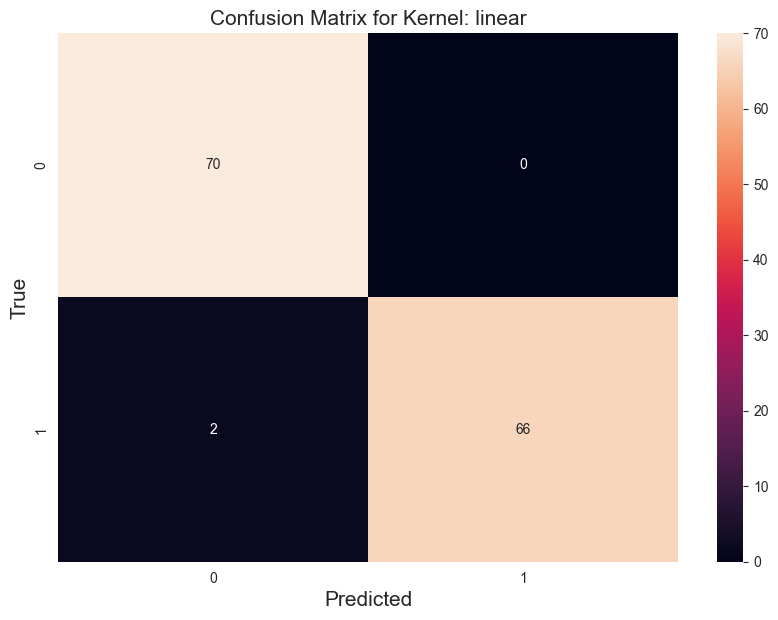

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.97      0.99        68

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Kernel:  poly


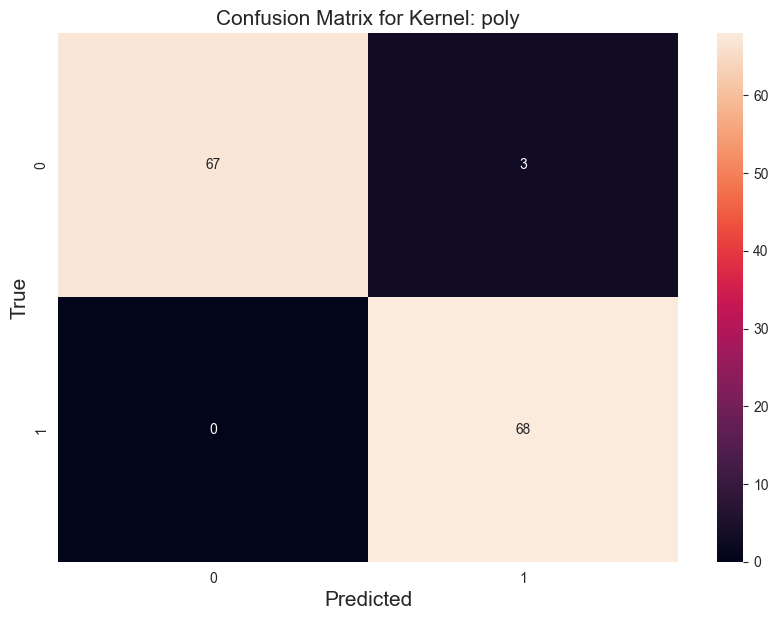

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        70
           1       0.96      1.00      0.98        68

    accuracy                           0.98       138
   macro avg       0.98      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138

Kernel:  rbf


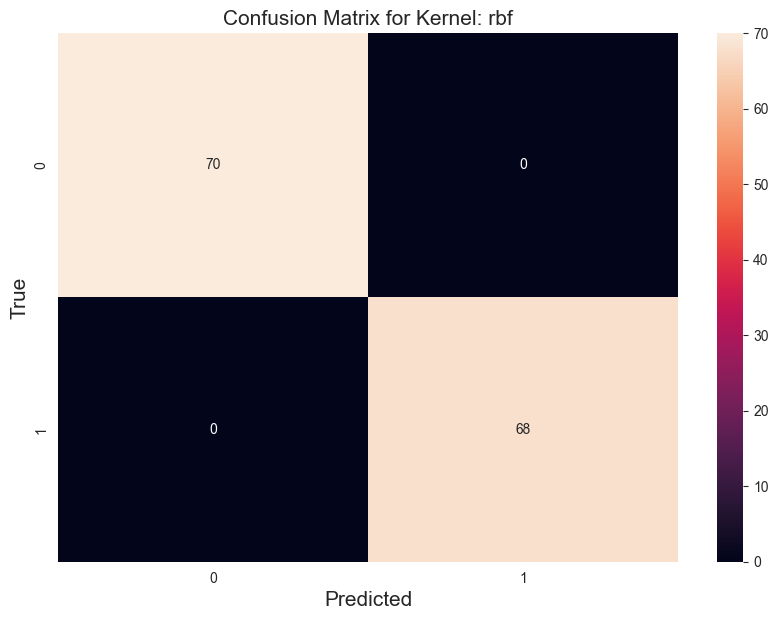

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        68

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Kernel:  sigmoid


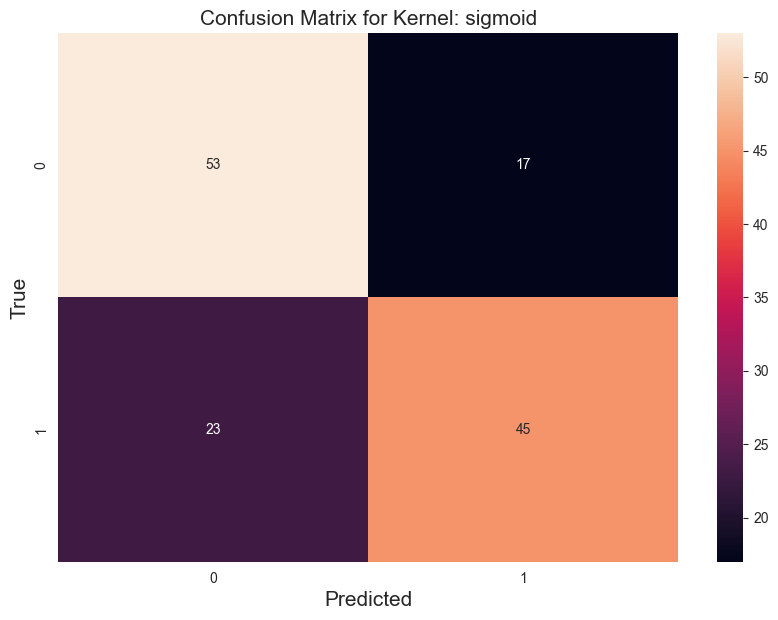

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        70
           1       0.73      0.66      0.69        68

    accuracy                           0.71       138
   macro avg       0.71      0.71      0.71       138
weighted avg       0.71      0.71      0.71       138

Kernel: precomputed


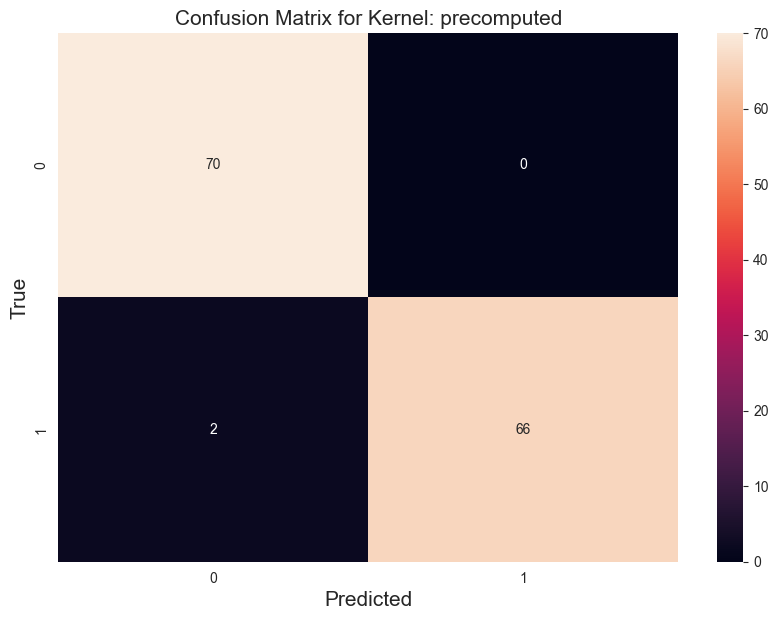

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.97      0.99        68

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Kernel:  linear


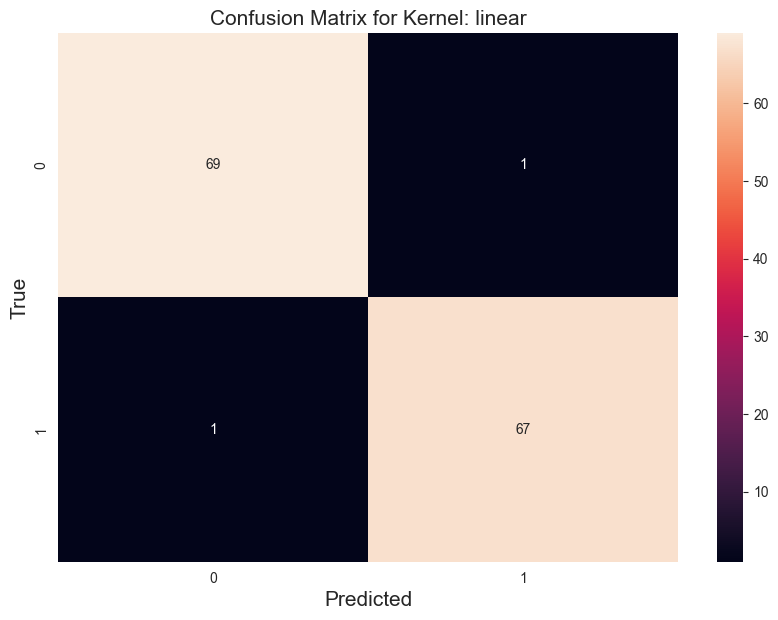

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      0.99      0.99        68

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Kernel:  poly


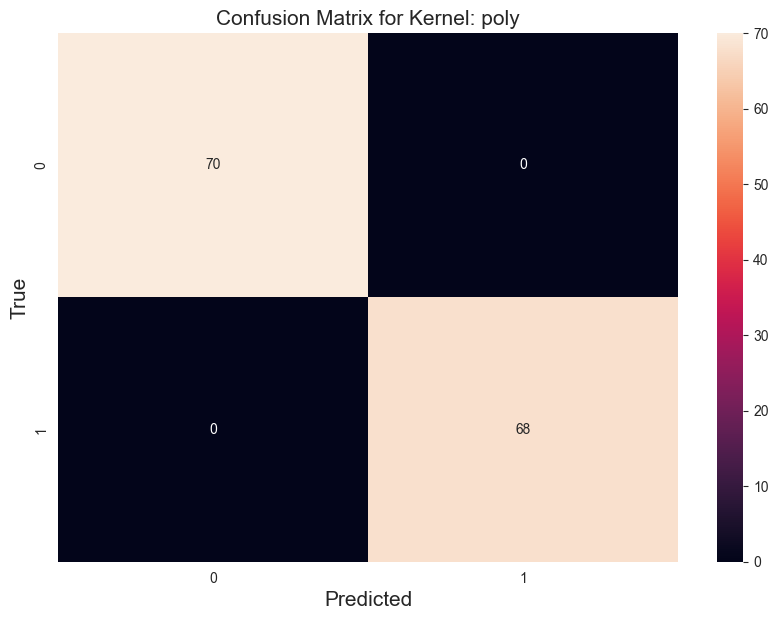

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        68

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Kernel:  rbf


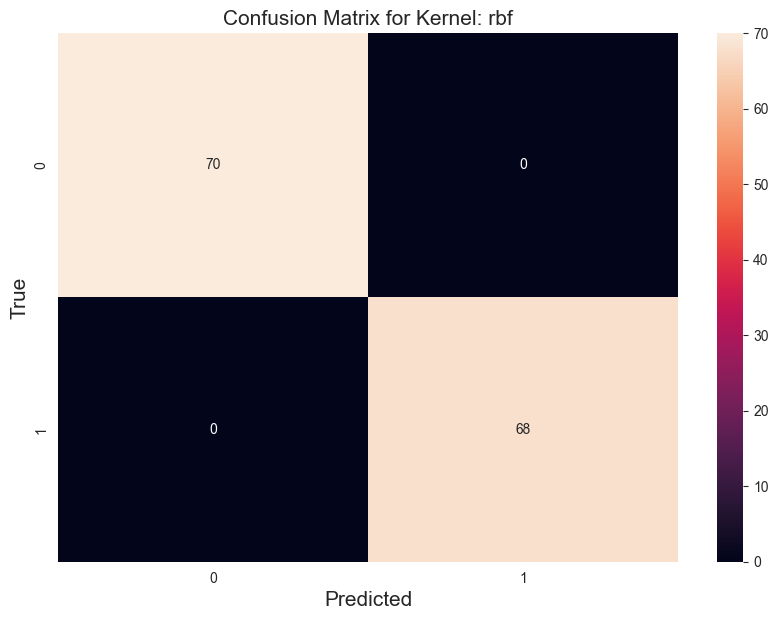

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        68

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Kernel:  sigmoid


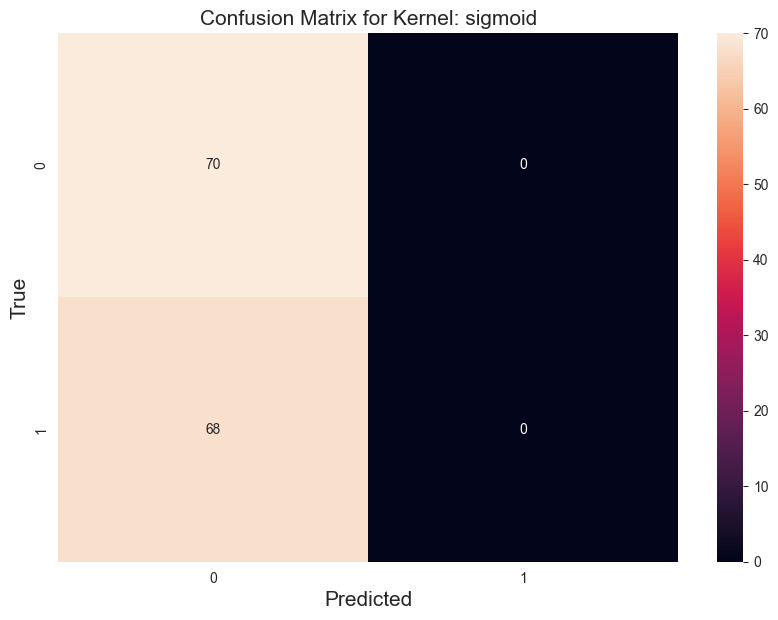

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        70
           1       0.00      0.00      0.00        68

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138

Kernel: precomputed


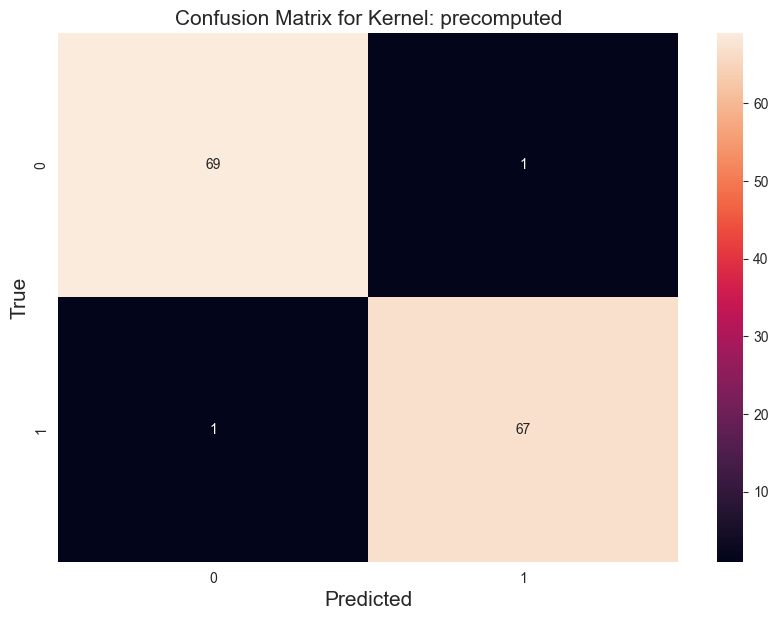

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      0.99      0.99        68

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [135]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print('Kernel: ', kernel)
    svmFunc(x_train, x_test, y_train, y_test, kernel)

print('Kernel: precomputed')
svmFunc_precomputed(x_train, x_test, y_train, y_test)


### Again with normalized data ###

sc = MinMaxScaler()
x_norm_train = sc.fit_transform(x_train)
x_norm_test = sc.transform(x_test)

for kernel in kernels:
    print('Kernel: ', kernel)
    svmFunc(x_norm_train, x_norm_test, y_train, y_test, kernel)

print('Kernel: precomputed')
svmFunc_precomputed(x_norm_train, x_norm_test, y_train, y_test)

### Problem 3

You may find this [tutorial](https://www.cvxpy.org/examples/machine_learning/ridge_regression.html) on using CVXPY for Ridge Regression helpful.

A). Implement a function for hard margin SVM in primal form using cvxpy. For keeping this task simple, assume w is two-dimensional, i.e. $f(x) = \text{sign}(w_1x_1 + w_2x_2 + b)$ where x and w are both two-dimensional vectors.


In [136]:
def Func(X, theta, theta0):
    return ((X@theta.value) + theta0.value)

B). Show the usage of your implementation on the IRIS dataset. We will only be making use of sepal-length and petal width as the two features. We have only two classes - Setosa and Not-Setosa. This problem is linearly separable.


In [137]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


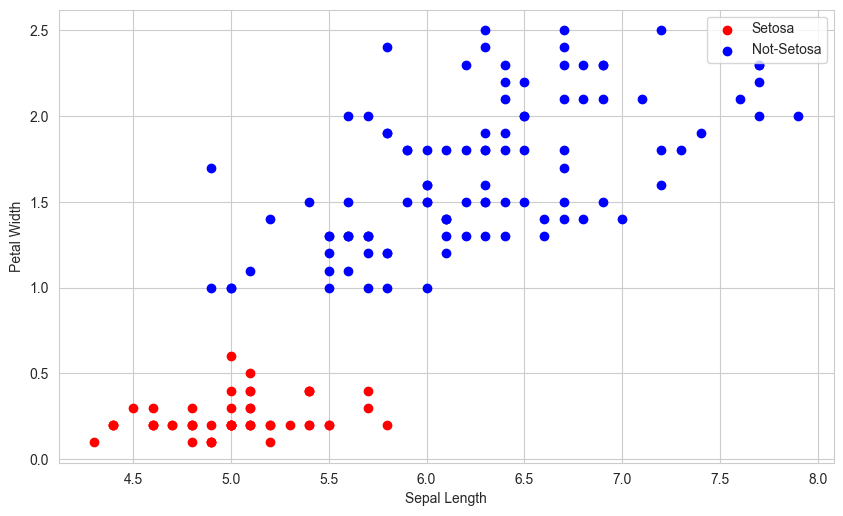

In [138]:
iris = df.drop(['SepalWidthCm', 'PetalLengthCm'], axis=1)
iris['Species'] = iris['Species'].apply(
    lambda x: 1 if x == 'Iris-setosa' else -1)


X = np.array(iris.drop(['Id', 'Species'], axis=1))
Y = np.array(iris['Species'])


plt.figure(figsize=(10, 6))
c1 = plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='r')
c2 = plt.scatter(X[Y == -1, 0], X[Y == -1, 1], c='b')
plt.legend((c1, c2), ('Setosa', 'Not-Setosa'))
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

C). Plot the decision boundary (separating hyperplane) in dark black and the margins in dotted lines. Encircle the support vector points.


Optimal value of ϴ =  [-2.46457378e-10 -5.00000000e+00]
Optimal value of ϴ0 =  [4.]


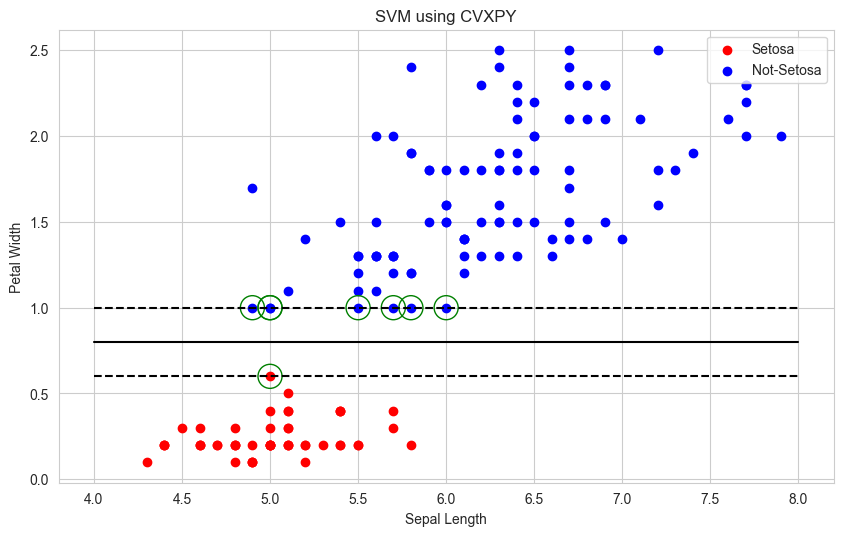

In [139]:
theta = cp.Variable(2)
theta0 = cp.Variable(1)

obj_fun = cp.Minimize(0.5*cp.square(cp.norm(theta)))

constraints = []
for i in range(150):
    constraints.append(1 - Y[i]*(theta@X[i] + theta0) <= 0)

prob = cp.Problem(obj_fun, constraints)
prob.solve()

# Optimal values of theta and theta0
Theta0 = theta0.value
Theta1 = theta.value[0]
Theta2 = theta.value[1]

print('Optimal value of \u03F4 = ', theta.value)
print('Optimal value of \u03F40 = ', theta0.value)


plt.figure(figsize=(10, 6))
c1 = plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='r')
c2 = plt.scatter(X[Y == -1, 0], X[Y == -1, 1], c='b')
plt.legend((c1, c2), ('Setosa', 'Not-Setosa'))
plt.title('SVM using CVXPY')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

x_axis = np.linspace(4, 8, 1000)
hyperplane = -Theta0 - (Theta1*x_axis)

plt.plot(x_axis, hyperplane/Theta2, 'k')

plt.plot(x_axis, (1 + hyperplane)/Theta2, 'k--')
plt.plot(x_axis, (-1 + hyperplane)/Theta2, 'k--')

for i in range(150):
    temp = Y[i]*Func(X[i], theta, theta0)
    if (np.round(temp, 2) == 1):
        plt.scatter(X[i][0], X[i][1], facecolors='none', s=300,
                    linewidth=1, marker='o', edgecolor='g')

plt.show()

D). Plot the decision boundary in dark black and the margins in dotted lines. This time use SKlearn’s SVM with a linear kernel. Encircle the support vector points. Do you get the same answer as when you use your own SVM?


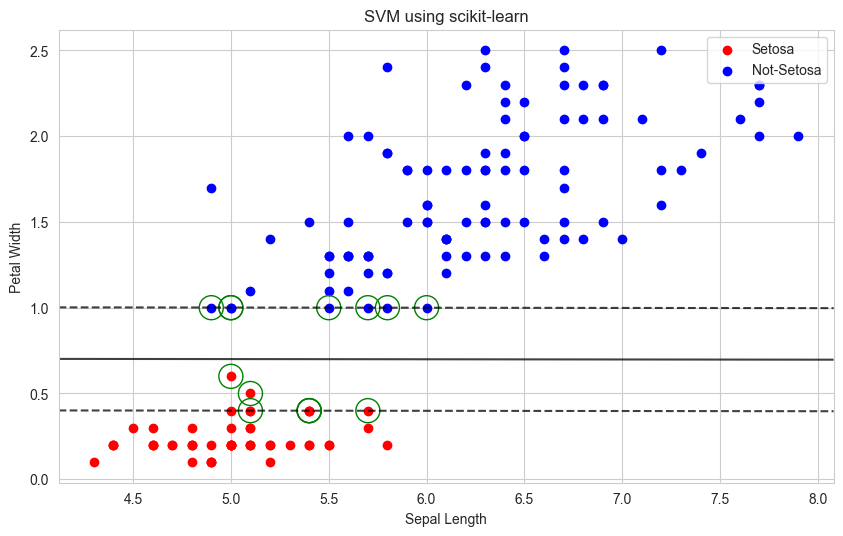

In [140]:
Y = np.where(Y == 1, 1, 0)

# Training SVM with a linear kernel
SVM = SVC(kernel='linear')
SVM.fit(X, Y)

# Data visualization
plt.figure(figsize=(10, 6))
c1 = plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='r')
c2 = plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='b')
plt.legend((c1, c2), ('Setosa', 'Not-Setosa'))
plt.title('SVM using scikit-learn')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
y1, x1 = np.meshgrid(y, x)
xy = np.vstack([x1.ravel(), y1.ravel()]).T
P = SVM.decision_function(xy).reshape(x1.shape)

# Plotting decision boundary and margins
ax.contour(x1, y1, P, colors='k',
           levels=[-1, 0, 1], alpha=0.75, linestyles=['--', '-', '--'])

# Plotting support vectors
ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[
           :, 1], s=300, linewidth=1, facecolors='none', edgecolors='g')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

E). If you throw away all the points except the support vectors, does your decision boundary remain the same? Why?


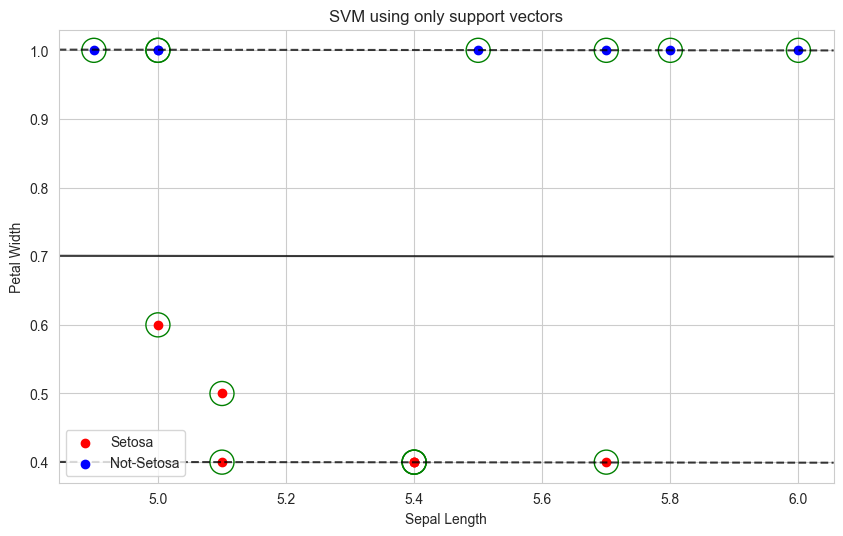

In [141]:
# Extract support vectors and their corresponding labels
X_sv = SVM.support_vectors_
Y_sv = Y[SVM.support_]

# Create a new SVM model using only support vectors
SVM_sv = SVC(kernel='linear')
SVM_sv.fit(X_sv, Y_sv)

# Data visualization with only support vectors
plt.figure(figsize=(10, 6))
c1 = plt.scatter(X_sv[Y_sv == 1, 0], X_sv[Y_sv == 1, 1], c='r')
c2 = plt.scatter(X_sv[Y_sv == 0, 0], X_sv[Y_sv == 0, 1], c='b')
plt.legend((c1, c2), ('Setosa', 'Not-Setosa'))
plt.title('SVM using only support vectors')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
P_sv = SVM_sv.decision_function(xy).reshape(XX.shape)

# Plotting decision boundary and margins using only support vectors
ax.contour(XX, YY, P_sv, colors='k',
           levels=[-1, 0, 1], alpha=0.75, linestyles=['--', '-', '--'])

# Plotting support vectors with rings
ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[
           :, 1], s=300, linewidth=1, facecolors='none', edgecolors='g')

plt.show()

---
**Observation and Justification**

As observed above when we discard all data points except the support vectors, the decision boundary remains the same. This phenomenon is primarily because support vectors play a pivotal role in defining the decision boundary of a Support Vector Machine (SVM).

Support vectors are the data points that are closest to the decision surface or the margin. They effectively determine the position and orientation of the decision boundary. This is because SVM aims to maximize the margin between different classes, and the margin is "supported" by these vectors.

Since the decision boundary of an SVM is primarily influenced by the support vectors, removing other data points that are not support vectors does not alter the position or orientation of the decision boundary. The support vectors essentially encapsulate the critical information needed to separate the classes optimally.

In summary, the decision boundary remains unchanged when we retain only the support vectors because they are the key elements that define and support the SVM's classification capability.

---
